In [1]:
from selenium import webdriver
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup
import requests
from IPython.display import display_html
import pandas as pd
import lxml
import io


In [ ]:
GOOGLE_CHROME_PATH = '/app/.apt/usr/bin/google_chrome'
CHROMEDRIVER_PATH = '/app/.chromedriver/bin/chromedriver'
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--no-sandbox')
chrome_options.binary_location = GOOGLE_CHROME_PATH
driver = webdriver.Chrome(execution_path=CHROMEDRIVER_PATH, chrome_options=chrome_options)

In [2]:
#webscarping stock market time series data from 1997 to today from unicredit website
#driver = webdriver.Chrome('C://Users//ADMIN//Downloads//chromedriver_win32//chromedriver.exe')
driver.get('https://1c-ir.mdgms.com/hist.html?lang=en')
year=driver.find_element_by_xpath("/html/body/div[1]/div/div/div[3]/div/div/div/div/div[1]/div[2]/div/form/div[3]/div[2]/div[3]/div")
year.click()
year1=driver.find_element_by_xpath("/html/body/div[1]/div/div/div[3]/div/div/div/div/div[1]/div[2]/div/form/div[3]/div[2]/div[3]/div/div/ul/li[24]")
year1.click()
data=driver.find_element_by_xpath("/html/body/div[1]/div/div/div[3]/div/div/div/div/div[1]/div[2]/div/form/div[5]/button")
data.click()
r= driver.current_url
excel = r.replace('HTML' , 'CSV')
data =pd.read_csv(excel, sep = ';', header = None)




In [9]:
#print(data)

                    0               1          2           3             4  \
0     Quotation  date  Opening  price  Low price  High price  Close  price   
1          20/01/1997         28.9474    28.9474     30.1746       29.6546   
2          21/01/1997         29.5959    28.8747     29.6686       29.3527   
3          22/01/1997         29.7413    29.7413     31.2564       30.8399   
4          23/01/1997         30.6079    30.5352     32.7744       32.3970   
...               ...             ...        ...         ...           ...   
5891       14/04/2020            7.44      7.004       7.472          7.10   
5892       15/04/2020            7.01      6.622        7.04         6.622   
5893       16/04/2020            6.71      6.553       6.889         6.666   
5894       17/04/2020           6.873       6.85        7.06         6.863   
5895       20/04/2020            6.95      6.752       6.982         6.897   

                       5  
0     Cumulative  volume  
1        

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import plotly.express as px

In [8]:
fig = px.line(data, x = 0, y = 4,labels={"4": "Closing Price", }, title='Uni Credit Closing Price Time Series')
fig.show()

In [201]:
df=data[4]
df1=df.drop([0])
#print (df1)

date= data[[0,4]]
date1=date.drop([0])

#print (date1)

1       29.6546
2       29.3527
3       30.8399
4       32.3970
5       32.7744
         ...   
5891       7.10
5892      6.622
5893      6.666
5894      6.863
5895      6.897
Name: 4, Length: 5895, dtype: object
               0        4
1     20/01/1997  29.6546
2     21/01/1997  29.3527
3     22/01/1997  30.8399
4     23/01/1997  32.3970
5     24/01/1997  32.7744
...          ...      ...
5891  14/04/2020     7.10
5892  15/04/2020    6.622
5893  16/04/2020    6.666
5894  17/04/2020    6.863
5895  20/04/2020    6.897

[5895 rows x 2 columns]


In [67]:

fig2 = px.scatter(date1,x=0, y=1)
fig2.show()

In [332]:
k= pd.to_datetime(date1[0])
df1.column=pd.to_datetime(date1[0])
#print(df1)



0
1997-01-20    29.6546
1997-01-21    29.3527
1997-01-22    30.8399
1997-01-23    32.3970
1997-01-24    32.7744
               ...   
2020-04-14       7.10
2020-04-15      6.622
2020-04-16      6.666
2020-04-17      6.863
2020-04-20      6.897
Name: 4, Length: 5895, dtype: object


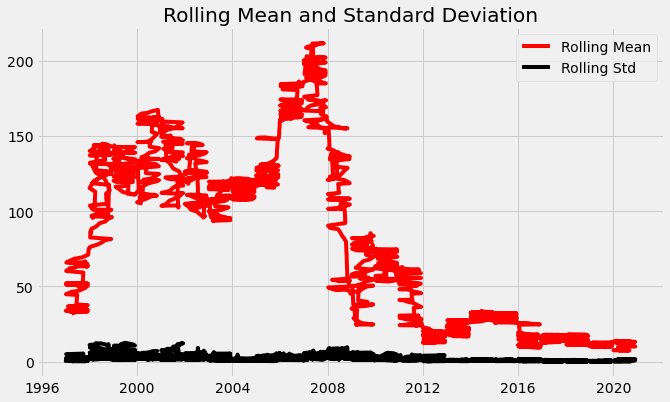

Results of dickey fuller test
Test Statistics                  -1.102172
p-value                           0.714205
No. of lags used                 32.000000
Number of observations used    5862.000000
critical value (1%)              -3.431466
critical value (5%)              -2.862033
critical value (10%)             -2.567033
dtype: float64


In [333]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    #plt.plot(timeseries , color='blue',label='Original')
    
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
   
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df1)

<Figure size 720x432 with 0 Axes>

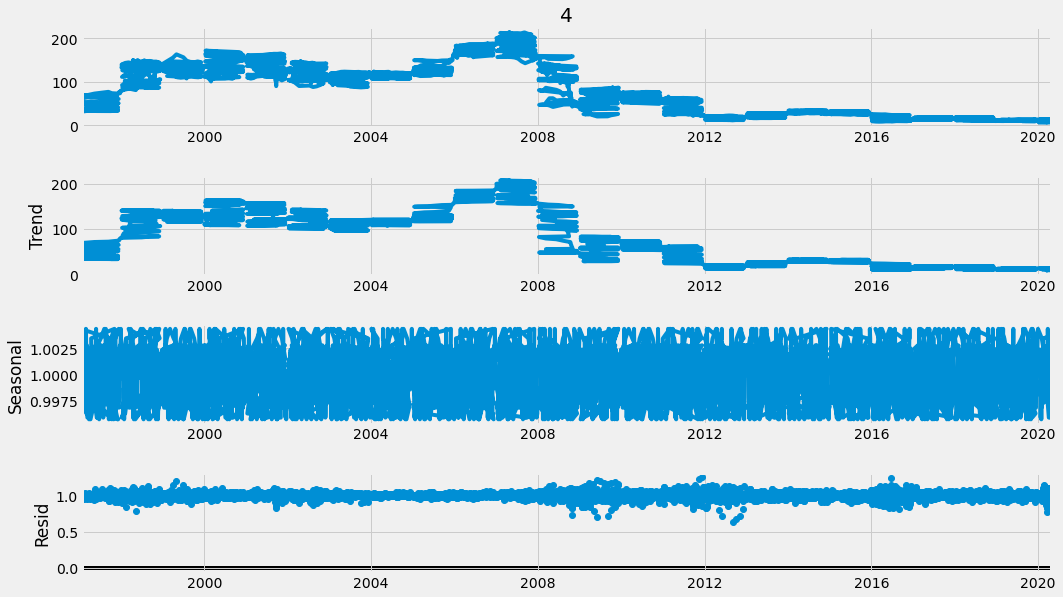

In [75]:
result = seasonal_decompose(df1, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [50]:
d=df1.values


['29.6546' '29.3527' '30.8399' ... '6.666' '6.863' '6.897']


In [51]:
fl = df1.astype(str).astype(float)



0
1997-01-20    29.6546
1997-01-21    29.3527
1997-01-22    30.8399
1997-01-23    32.3970
1997-01-24    32.7744
               ...   
2020-04-14     7.1000
2020-04-15     6.6220
2020-04-16     6.6660
2020-04-17     6.8630
2020-04-20     6.8970
Name: 4, Length: 5895, dtype: float64


In [53]:
l1 = np.log(fl)


0
1997-01-20    3.389617
1997-01-21    3.379385
1997-01-22    3.428809
1997-01-23    3.478066
1997-01-24    3.489648
                ...   
2020-04-14    1.960095
2020-04-15    1.890397
2020-04-16    1.897020
2020-04-17    1.926145
2020-04-20    1.931087
Name: 4, Length: 5895, dtype: float64


In [ ]:
#df5= np.fromstring(df1,sep=',')
#df_log = np.log(df5)
#df6=pd.Series(df_log)
#df6.head
#print(df5)
#3print(df_log)

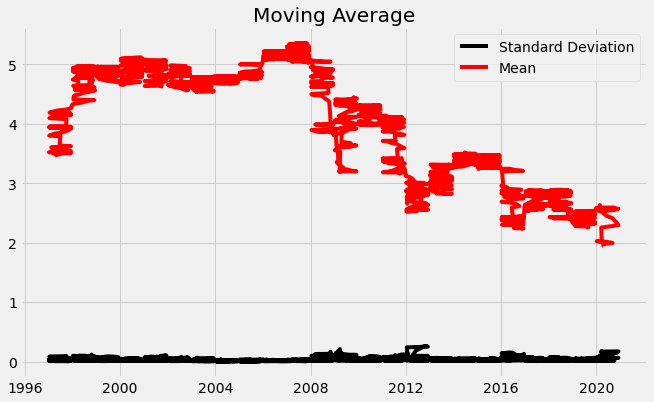

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#df_log = np.log(df5)
moving_avg = l1.rolling(12).mean()
std_dev = l1.rolling(12).std()
#plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

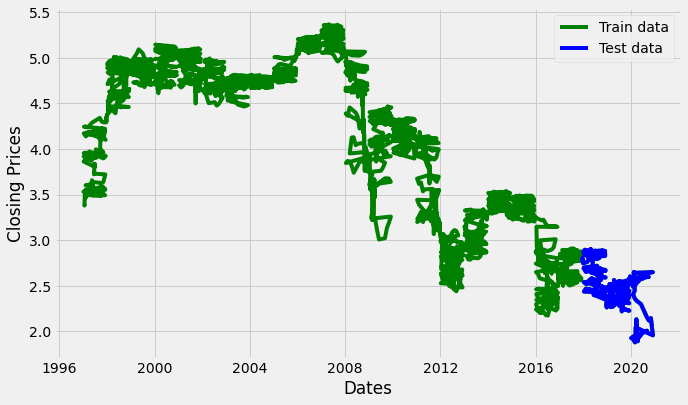

In [60]:
train_data, test_data = l1[3:int(len(l1)*0.9)], l1[int(len(l1)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(l1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [61]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-23212.990, BIC=-23199.839, Time=3.632 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-23218.058, BIC=-23198.331, Time=1.594 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-23217.845, BIC=-23198.118, Time=2.522 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-23214.875, BIC=-23208.299, Time=1.293 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-23217.045, BIC=-23190.742, Time=1.973 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-23216.431, BIC=-23190.128, Time=1.949 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-23215.110, BIC=-23182.232, Time=10.652 seconds
Total fit time: 24.114 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5302
Model:               SARIMAX(1, 1, 0)   Log Likeliho

AttributeError: 'ARIMA' object has no attribute 'plot'

AttributeError: 'Rectangle' object has no property 'normed'

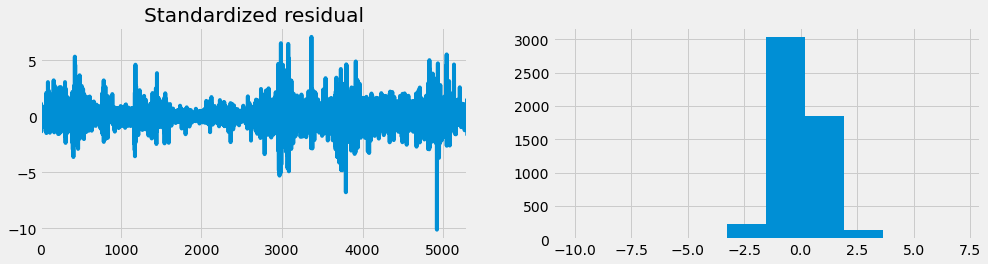

In [62]:
#model_autoARIMA.plot_diagnostics(figsize=(15,8))
#plt.show()

NameError: name 'train_Data' is not defined

In [64]:
model = ARIMA(train_data.values, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5301
Model:                 ARIMA(3, 1, 2)   Log Likelihood               11634.754
Method:                       css-mle   S.D. of innovations              0.027
Date:                Mon, 20 Apr 2020   AIC                         -23255.509
Time:                        20:23:12   BIC                         -23209.479
Sample:                             1   HQIC                        -23239.424
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.353      0.724      -0.001       0.001
ar.L1.D.y     -0.1192      0.112     -1.060      0.289      -0.340       0.101
ar.L2.D.y      0.7597      0.107      7.077      0.0

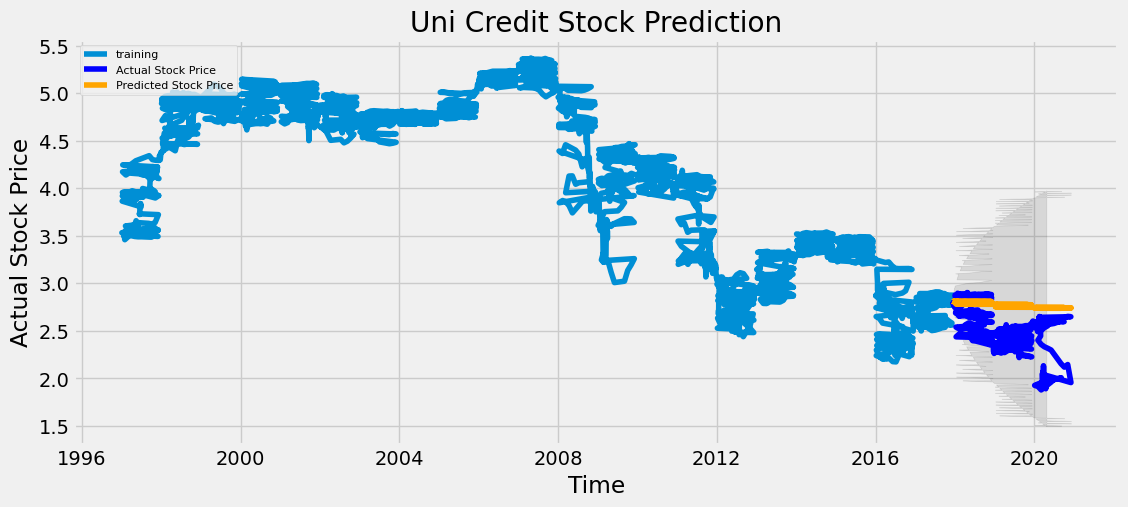

In [65]:
# Forecast
fc, se, conf = fitted.forecast(590, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Uni Credit Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [66]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.10491349181482053
MAE: 0.271391419730603
RMSE: 0.32390352238717707
MAPE: 0.11480690715162663
